<a href="https://colab.research.google.com/github/Divyanshu-ISM/Oil-and-Gas-data-analysis/blob/master/ANG1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Excercise 1: Single variable(Feature) Linear Regression.

##$ h_{\theta}(x) = \theta_{0} + \theta_1(x1)$

###Dataset description - 
The first column is the population of a city and the second column is
the profit of a food truck in that city. A negative value for profit indicates a
loss.


In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
from mpl_toolkits.mplot3d import axes3d

#Part 1:- Importing and Visualization.

In [75]:
#Something New.
sns.set(context="notebook", style="whitegrid", palette="dark")

In [76]:
#Import the dataframe. And give the column headings since csv doesn't have em.
df = pd.read_csv('ex1data1.txt', names=['population', 'profit'])

In [77]:
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [78]:
X = df.iloc[:,0]

y = df.iloc[:,1]

In [ ]:
# X iloc and loc access single rows/columns as series. 

In [ ]:
#

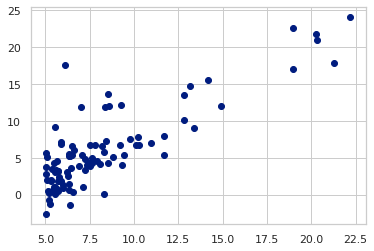

In [79]:
plt.scatter(X,y)

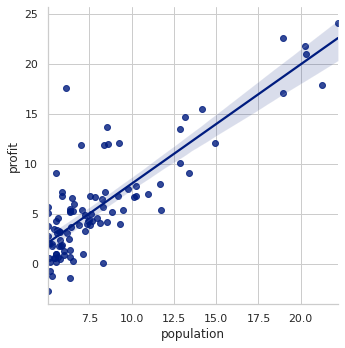

In [80]:
sns.lmplot('population','profit',data=df)

In [ ]:
# Population is in 10,000s &
# Profit is in 10,000s.

In [ ]:
####################################################################################

#Part 2: Batch Gradient Descent.

In [90]:
def cost(theta, X,y):

  # x = np.array(X)
  # y = np.array(y)

  h = theta[0]*X.iloc[:,0] + theta[1]*X.iloc[:,1]

  m = 97

  J = (1/2/m)*(np.sum((h - y)**2))

  return J


In [91]:
x0 = np.ones(97)

x1 = np.array(df.iloc[:,0])

d = {'X0':x0 , 'X1':x1}

X = pd.DataFrame(d)

In [ ]:
# X.iloc[:,0]

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
     ... 
92    1.0
93    1.0
94    1.0
95    1.0
96    1.0
Name: X0, Length: 97, dtype: float64

In [92]:
theta = np.zeros((2,1))

theta.T

array([[0., 0.]])

In [93]:
# theta = [np.linspace(-2,2,97) , np.linspace(0,5,97)]

J = cost(theta,X,y)
J

32.072733877455676

In [94]:
####################################

#Batch Gradient Descent.

In [95]:
grad = np.zeros((2,1))

In [107]:
def grad_desc(epoch, theta, X, y):

  grad = np.zeros((2,1))

  m = 97

  # h = h = theta[0]*X.iloc[:,0] + theta[1]*X.iloc[:,1]

  # grad_0 = (1/m)*np.sum(h - y) 

  # grad_1 = (1/m)*np.sum(grad_0*X.iloc[:,1])

  for i in range(epoch):

    h = theta[0]*X.iloc[:,0] + theta[1]*X.iloc[:,1]

    grad[0] = (1/m)*np.sum(h - y) 
    grad[1] = (1/m)*np.sum(np.dot((h - y) ,X.iloc[:,1]))

    theta = theta - 0.001*grad
  
  return theta





In [105]:
theta_final = grad_desc(500,theta,X,y)

In [106]:
J = cost(theta_final,X,y)
J

5.678468473590414

array([  0,  20,  41,  61,  82, 102, 123, 143, 164, 184, 205, 225, 246,
       266, 287, 307, 328, 348, 369, 389, 410, 430, 451, 471, 492, 512,
       533, 553, 574, 594, 615, 635, 656, 676, 697, 717, 738, 758, 779,
       800])

In [111]:
eps = np.linspace(0,800,40,dtype='int')

loss = []

for e in eps:

  theta_final = grad_desc(e,theta,X,y)

  J = cost(theta_final,X,y)

  loss.append(J)





  


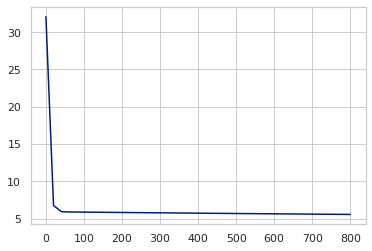

In [113]:
plt.plot(eps,loss)

In [114]:
theta_final = grad_desc(500,theta,X,y)

theta_final

array([[-0.26293785],
       [ 0.82807516]])

In [115]:
#Visualization the actual data scatter with the Model.

In [119]:
y_p = theta_final[0] + theta_final[1]*df['population']

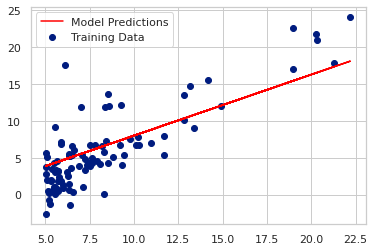

In [123]:
plt.scatter(df['population'],df['profit'],label='Training Data')

plt.plot(df['population'],y_p,label='Model Predictions',color='red')

# plt.figure(figsize=(8,4))

plt.legend()